In [26]:
import pandas as pd
import numpy as np

In [27]:
train=pd.read_csv('../train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [28]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
def miss_ayir(s):
    if "Miss" in s:
        return "Miss"
    elif "Mrs" in s:
        return "Mrs"
    elif "Mr" in s:
        return "Mr"
    elif "Ms" in s:
        return "Ms"
    elif '' in s:
        return "None"

In [30]:
train['Ek']=train.Name.apply(miss_ayir)
train["Age"]=train['Age'].fillna(train.groupby('Ek')['Age'].transform('mean'))

In [51]:
train2=train.copy()
train2.drop(columns=['Cabin'],inplace=True)
train2.Embarked=train2.Embarked.fillna('C')
train2.dropna(inplace=True)
cols=['Name','Sex','Ticket','Embarked','Ek']
train3=pd.concat([train2,pd.get_dummies(train2[cols])],axis=1).drop(cols,axis=1)

In [52]:
X=train3.drop('Survived',axis=1)
y=train3.Survived

In [68]:
from sklearn.linear_model import LogisticRegression
hayatta_kalma = LogisticRegression(solver='liblinear')
hayatta_kalma2= LogisticRegression(penalty = 'l2', C = 1, random_state = 0,solver='liblinear')

In [69]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.2, random_state=111)

In [70]:
hayatta_kalma.fit(X_eğitim, y_eğitim)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
egitim_dogruluk = hayatta_kalma.score(X_eğitim, y_eğitim)
test_dogruluk = hayatta_kalma.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.92
Modelin test verisindeki doğruluğu   : 0.82


In [72]:
tahmin_değerleri = np.array([X_test.iloc[21]])
print(hayatta_kalma.predict(tahmin_değerleri))

[0]


In [73]:
tahmin_eğitim=hayatta_kalma.predict(X_eğitim)
tahmin_test=hayatta_kalma.predict(X_test)
tahmin_test_ihtimal=hayatta_kalma.predict_proba(X_test)[:,1]

In [74]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[424  12]
 [ 43 233]]
Hata Matrisi (Test verileri)
------------------------------
[[99 14]
 [19 47]]


### 1. Doğruluk(Accuracy)
Doğru olarak sınıflandırılanların toplam sayıya oranına doğruluk diyoruz.

In [75]:
from sklearn.metrics import accuracy_score
print("accuracy_score() değeri         : ",  accuracy_score(y_test, tahmin_test))

accuracy_score() değeri         :  0.8156424581005587


### 2. Hata Oranı
1-Doğruluk=0.163

### 3. Hassasiyet (Precision)
Hassasiyet pozitif olarak tahmin edilenlerin ne kadarının gerçekten pozitif olduğunu gösterir.

In [76]:
from sklearn.metrics import precision_score
print("precision_score() değeri        : ",  precision_score(y_test, tahmin_test))

precision_score() değeri        :  0.7704918032786885


### 4. Duyarlılık (Recall/Sensitivity)
Gerçekten pozitif olanların ne kadar başarılı tahmin edildiğidir.

In [77]:
from sklearn.metrics import recall_score
print("recall_score() değeri        : ",  recall_score(y_test, tahmin_test))

recall_score() değeri        :  0.7121212121212122


### 5. F1 Score

In [78]:
from sklearn.metrics import f1_score
print("f1_score() değeri     : ",  f1_score(y_test, tahmin_test))

f1_score() değeri     :  0.7401574803149605


In [79]:
from sklearn.metrics import classification_report, precision_recall_fscore_support
print(classification_report(y_test,tahmin_test))
print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test, tahmin_test)))
print('\n')
metrikler =  precision_recall_fscore_support(y_test, tahmin_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2])

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       113
           1       0.77      0.71      0.74        66

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179

f1_score() değeri        : 0.74
recall_score() değeri    : 0.71
precision_score() değeri : 0.77


Hassasiyet : [0.83898305 0.7704918 ]
Duyarlılık : [0.87610619 0.71212121]
F1 Skoru   : [0.85714286 0.74015748]


### ROC Eğrisi

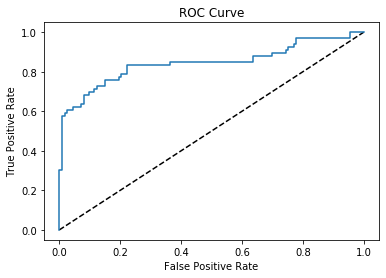

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)
import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [81]:
print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal))

AUC Değeri :  0.8435237329042639


### Hassasiyet/Duyarlılık Eğrisi

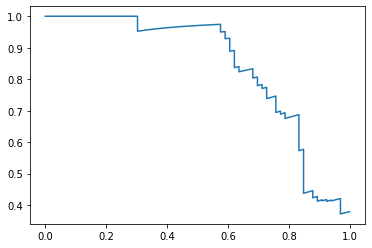

In [82]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()

### C=1 değeri için ROC eğrisi

In [83]:
hayatta_kalma2.fit(X_eğitim, y_eğitim)
tahmin_eğitim2=hayatta_kalma2.predict(X_eğitim)
tahmin_test2=hayatta_kalma2.predict(X_test)
tahmin_test_ihtimal2=hayatta_kalma2.predict_proba(X_test)[:,1]

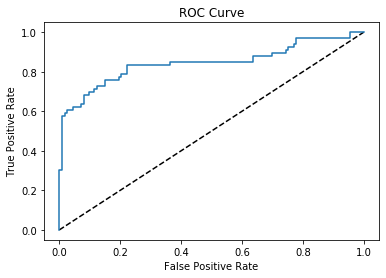

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal2)
import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Hassasiyet/Duyarlılık Eğrisi

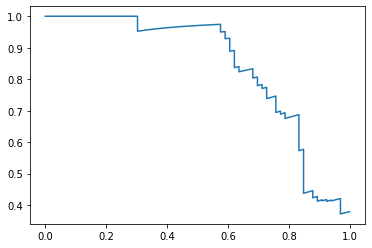

In [85]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal2)

plt.plot(duyarlılık, hassasiyet)
plt.show()